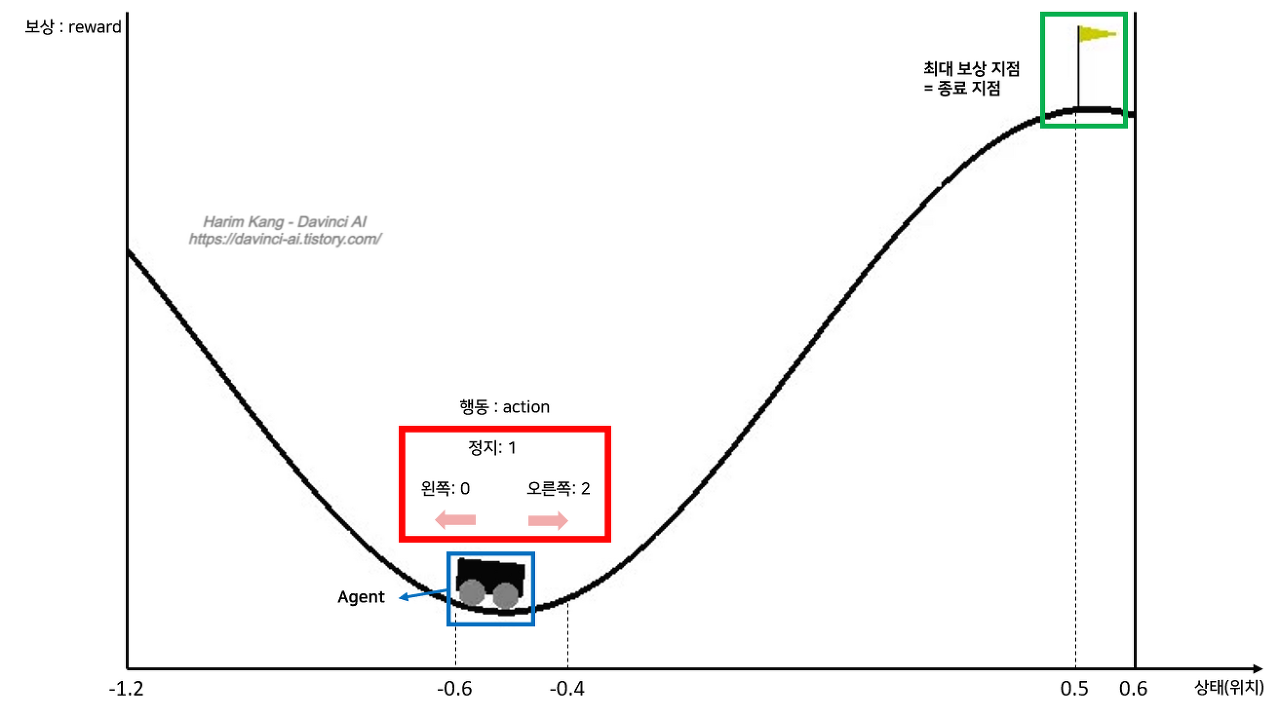

# GYM 라이브러리
pip install gym[all]

# Environment
언덕 - 왼쪽과 오른쪽을 반복하여 가속도를 만들어야 오를 수 있는 환경  

# Agent
자동차  

# Action
'왼쪽', '정지', '오른쪽'  

# Reward
Reward: time step 마다 -1, 깃발(x축 0.5 지점)에 도착하는 것(종료 조건)이 목표!  

최대 time step = 200  
  
무작정 오른쪽으로 간다고 되는 것이 아니라  
왼쪽 오른쪽을 반복하여 가속도를 얻어야 언덕을 오를 수 있다.

# 학습 알고리즘을 적용하지 않고 랜덤으로 행동 했을 때

Colab 환경에서는 env.render()가 작동하지 않음.
   
Grapic으로 agent가 움직이는 것을 보고 싶다면 다른 환경에서 실행 해 주세요.

In [24]:
import gym

# 환경 가져오기
env = gym.make('MountainCar-v0')

# 에피소드의 수
episodes = 10

for i in range(episodes):
    observation = env.reset()
    tot_reward = 0

    while True:
      # colab 환경에서 동작하지 않습니다.
      # env.render()

      # 랜덤한 행동 취하기
      action = env.action_space.sample()
      observation, reward, done, info = env.step(action)

      # 보상 누적
      tot_reward += reward
      
      # 에피소드 하나가 종료되면 결과 출력후 다음 에피소드로
      if done:
        print('Episode {} Average Reward: {}'.format(i+1, tot_reward))
        break

Episode 1 Average Reward: -200.0
Episode 2 Average Reward: -200.0
Episode 3 Average Reward: -200.0
Episode 4 Average Reward: -200.0
Episode 5 Average Reward: -200.0
Episode 6 Average Reward: -200.0
Episode 7 Average Reward: -200.0
Episode 8 Average Reward: -200.0
Episode 9 Average Reward: -200.0
Episode 10 Average Reward: -200.0


# State의 이산화

기존 환경의 상태는 [position, velocity]로 [-1.2, -0.07] ~ [0.6, 0.07]의 연속된 값을 가진다.  
  
Q 학습 알고리즘을 적용하기 위해 상태를 이산화 한다.  

position은 10을 곱하고 소수점 첫째짜리에서 반올림한다. --> 19  

velocity는 100을 곱하고 소수점 첫째자리에서 반올림한다.  --> 15  

Q 상태, 행동 가치 함수를 19(position) x 15(velocity) x 3(action)의 테이블에 저장한다.

In [51]:
import numpy as np
import gym

env = gym.make('MountainCar-v0')

initial_state = env.reset()

print("env.observation_space.high : {}".format(env.observation_space.high)) # 상태 공간 에서 최대로 가질 수 있는 값
print("env.observation_space.low : {}".format(env.observation_space.low)) # 상태 공간에서 최소로 가질 수 있는 값
print("example state : {}".format(initial_state)) # 초기 상태의 예
print()

# 연속된 상태를 이산화 하기
initial_state = (initial_state - env.observation_space.low)*np.array([10, 100])
initial_state = np.round(initial_state, 0).astype(int)
print("example state 이산화")
print("position : {}, velocity : {}".format(initial_state[0], initial_state[1])) # 위의 initial_state의 이산화 후의 상태이다.
print()

# 이산화된 상태의 개수
num_states = (env.observation_space.high - env.observation_space.low)*np.array([10, 100])
num_states = np.round(num_states, 0).astype(int) + 1
print("num_position: {}, num_velocity: {}".format(num_states[0], num_states[1]))

# Q 상태, 행동 가치함수 테이블 (Q value)
Q = np.random.uniform(low = -1, 
                      high = 1, 
                      size = (num_states[0], 
                              num_states[1], 
                              env.action_space.n))
print("Q : {}".format(Q))

env.observation_space.high : [0.6  0.07]
env.observation_space.low : [-1.2  -0.07]
example state : [-0.57811626  0.        ]

example state 이산화
position : 6, velocity : 7

num_position: 19, num_velocity: 15
Q : [[[-9.43547586e-01 -9.61244828e-01 -7.03555424e-01]
  [-6.44509295e-02 -7.11590626e-02 -5.67893205e-01]
  [ 4.90478452e-01  6.24932377e-01  5.49177001e-02]
  [-7.02625192e-01 -5.01789346e-01  9.42769495e-01]
  [ 5.86281182e-01  7.60616347e-01  7.35277592e-01]
  [ 8.11883497e-01  2.92776749e-01 -5.95485834e-01]
  [ 5.64746212e-01  4.73125301e-01  7.31229080e-01]
  [-6.80830180e-02  9.78676672e-01 -5.42976509e-02]
  [ 1.92687981e-01 -1.54678904e-02  3.07624771e-01]
  [ 6.09961288e-01 -9.71040158e-01  8.35145806e-01]
  [-9.96946642e-01  8.08123547e-02 -4.40036028e-01]
  [ 7.09025370e-01 -1.50731934e-01  9.83199968e-01]
  [-5.00609175e-01 -5.02651780e-01  2.80605428e-01]
  [ 4.29460893e-01  5.63789895e-02 -2.58547279e-03]
  [-5.87612344e-01  6.91681661e-01  7.11953479e-01]]

 [[-6.7

# Q learning 알고리즘을 적용한 전략

func input:


*   env: 환경
*   learning: 학습률
*   discount: 할인율
*   epsilon: epsilon-soft를 구현하기 위한 값
*   min_eps: 최소 epsilon 값
*   episodes: episode의 수




Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -199.69
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0
Episode 2800 Average Reward: -199.32

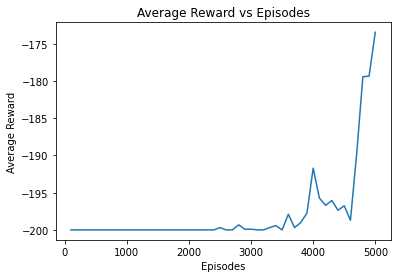

In [22]:
import numpy as np
import gym
import matplotlib.pyplot as plt

# gym 라이브러리에서 환경 가져오기
env = gym.make('MountainCar-v0')
env.reset()

# Q-학습 알고리즘 함수 정의
def QLearning(env, learning, discount, epsilon, min_eps, episodes):


    # 연속적인 상태를 이산화 하기
    num_states = (env.observation_space.high - env.observation_space.low)*np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Q table 초기화
    Q = np.random.uniform(low = -1, 
                          high = 1, 
                          size = (num_states[0], 
                                  num_states[1], 
                                  env.action_space.n))
    
    # 에피소드의 보상을 저장할 리스트
    reward_list = []
    ave_reward_list = []
    
    # 에피소드마다 입실론의 크기를 줄이는 단위
    reduction = (epsilon - min_eps)/episodes
    
    # Q 학습 알고리즘
    for i in range(episodes):

        # 매개변수 초기화
        done = False
        tot_reward, reward = 0,0

        # 현재 상태 하나 받아오기
        state = env.reset()
        
        # 현재 상태 이산화
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
    
        while True:   
            # 마지막 20개의 에피소드를 GUI로 출력 Colab 환경에서는 동작하지 않습니다.
            # if i >= (episodes - 20):
            #     env.render()
                
            # 다음 행동 결정하기 - epsilon soft strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]])
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # 행동을 취하고 다음 상태와 보상을 얻기
            state2, reward, done, info = env.step(action) 
            
            # 다음 상태 이산화 하기
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            # 종료 상태에 대한 Q 상태-행동 가치함수 업데이트
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Q 상태-행동 가치함수 업데이트
            else:
                delta = learning*(reward + discount*np.max(Q[state2_adj[0], state2_adj[1]]) - Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # reward 기록, 현재 상태 업데이트
            tot_reward += reward
            state_adj = state2_adj

            # 200 time step이 되었거나 카트가 종료 상태에 도달했을 때
            if done:
              break

        # --end while--
        

        # 입실론 값 줄여주기
        # 학습 초기에는 랜덤하게 다양한 행동을 취하고, 학습이 진행될 수록 탐욕적인 행동을 취하기 위함
        if epsilon > min_eps:
            epsilon -= reduction
        
        # 보상 기록
        reward_list.append(tot_reward)
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
        
        # --end for--
            
    env.close()
    return ave_reward_list

  # --end func--


# Q-학습 알고리즘
rewards = QLearning(env, learning=0.2, discount=0.9, epsilon=0.8, min_eps=0, episodes=5000)

# 보상들을 그래프로 표시
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.savefig('rewards.jpg')    
plt.show() 
plt.close() 